In [4]:

# loading packages
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import missingno as msno # missing values
%matplotlib inline

# stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.ensemble import RandomForestRegressor
seed = 123

# importing data ( ? = missing values)
df= pd.read_csv("Auto-Data.csv", na_values = '?')
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [19]:
df.head(5).append(data.tail(5))


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


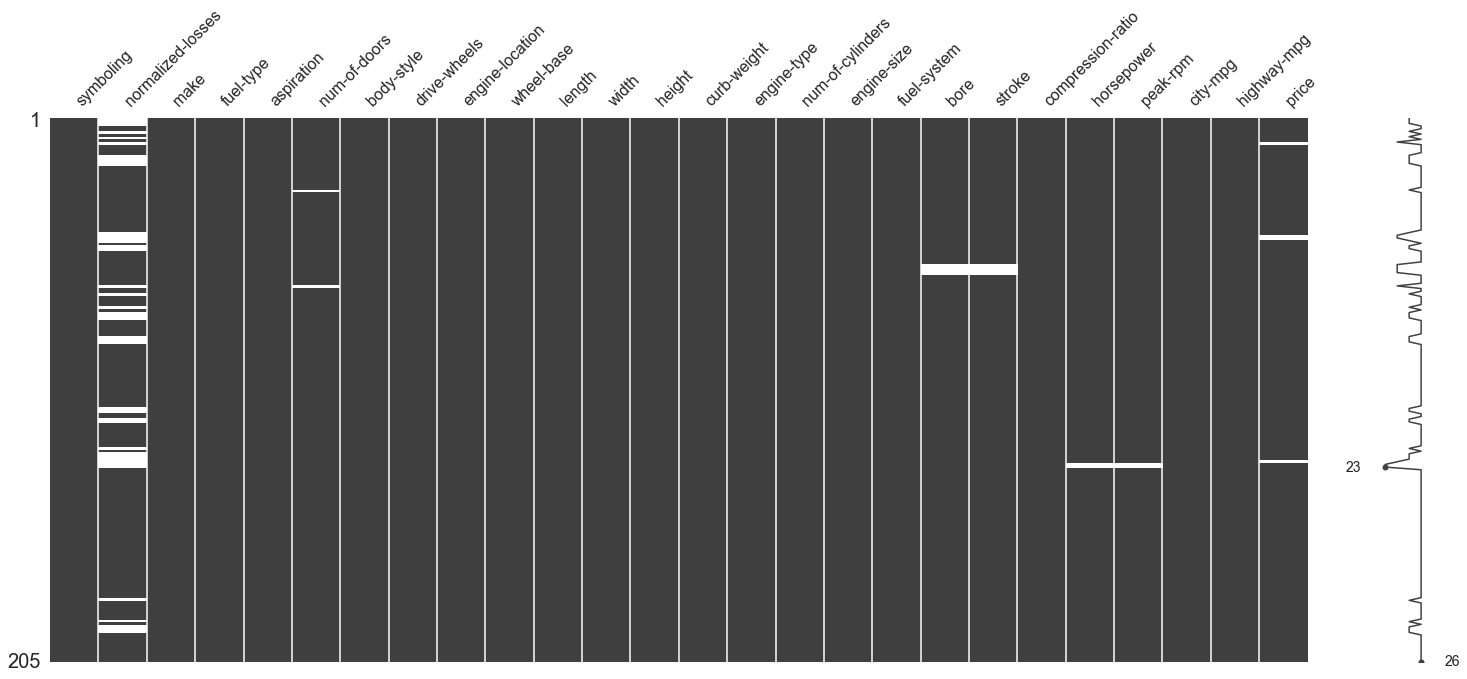

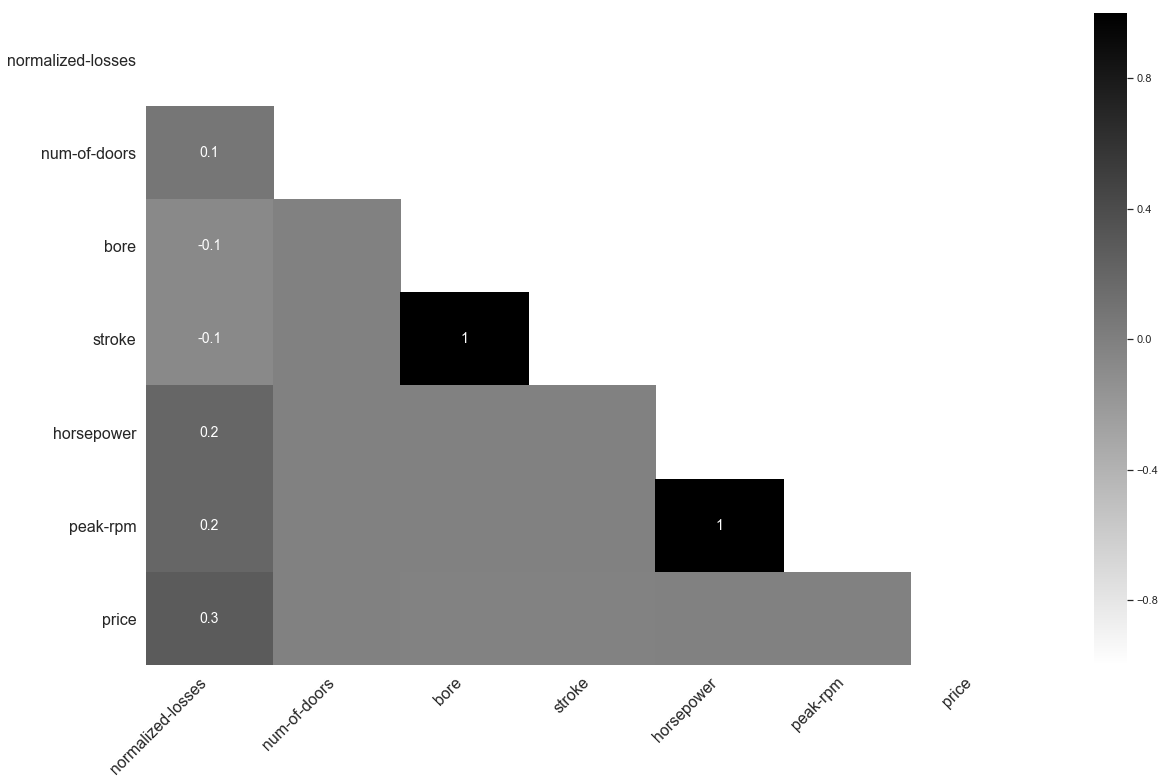

In [25]:

# missing values?
sns.set(style = "ticks")

msno.matrix(df)
msno.heatmap(df, cmap = 'binary')

In [28]:
df[pd.isnull(df['normalized-losses'])].head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


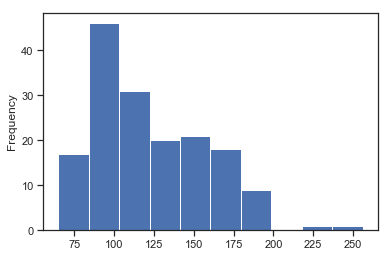

In [29]:
df['normalized-losses'].plot.hist()

In [31]:

df.groupby('symboling')['normalized-losses'].describe()

,count,mean,std,min,25%,50%,75%,max
symboling,,,,,,,,
-2,3.0,103.000000,0.000000,103.0,103.00,103.0,103.0,103.0
-1,20.0,85.600000,18.528499,65.0,71.75,91.5,95.0,137.0
0,48.0,113.166667,32.510773,77.0,91.00,102.0,120.5,192.0
1,47.0,128.574468,28.478630,74.0,105.50,125.0,148.0,231.0
2,29.0,125.689655,30.167513,83.0,94.00,134.0,137.0,192.0
3,17.0,168.647059,30.636867,142.0,150.00,150.0,194.0,256.0


# Grouping bz mean using the transform function 

In [32]:
df = df.dropna(subset = ['price', 'bore', 'stroke', 'peak-rpm', 'horsepower', 'num-of-doors'])
df['normalized-losses'] = df.groupby('symboling')['normalized-losses'].transform(lambda x: x.fillna(x.mean()))

print('In total:', df.shape)
df.head()

In total: (193, 26)


C:\Users\Sunil Kumar Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# To PLOT.corr plots with better visiblity

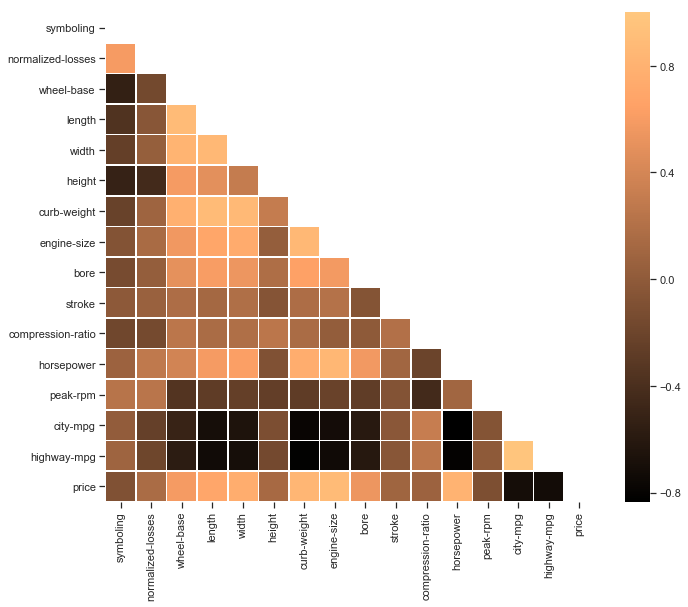

In [43]:
# Compute the correlation matrix 
corr_all = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "copper")      
plt.show()

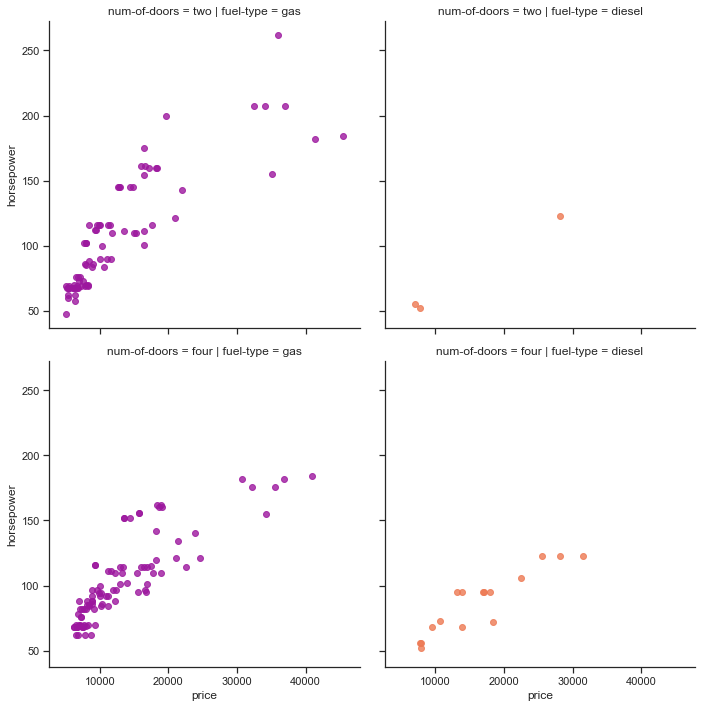

In [54]:
# THIS WILL DO A PIVOT TYPE OF DATA ...so u understand data
sns.lmplot('price', 'horsepower', df, 
           hue = 'fuel-type', col = 'fuel-type',  row = 'num-of-doors', 
           palette = 'plasma', scatter = True, 
           fit_reg = False)

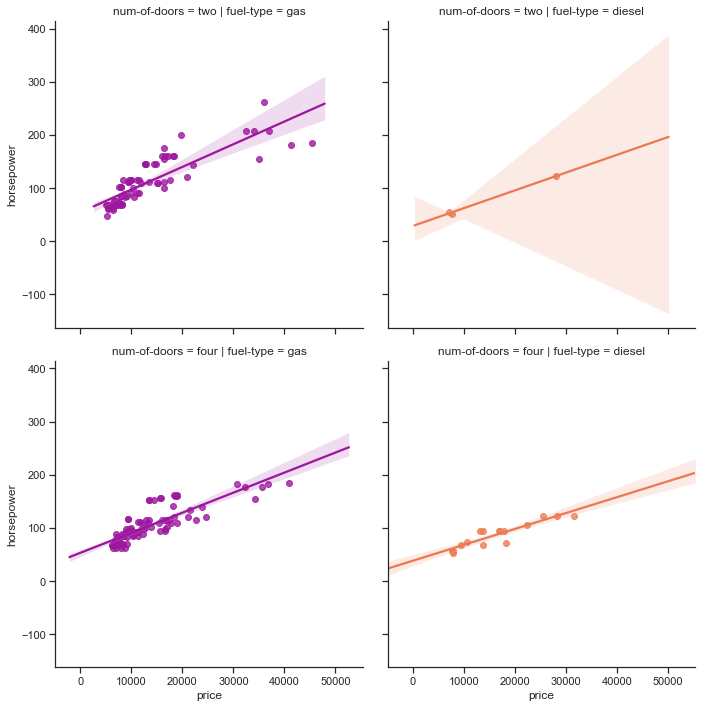

In [55]:
# THIS WILL DO A PIVOT TYPE OF he PREDICTIONS OF LINEAR MODEL(u can choose logistic, if categorz) ...so u understand data
sns.lmplot('price', 'horsepower', df, 
           hue = 'fuel-type', col = 'fuel-type',  row = 'num-of-doors', 
           palette = 'plasma', 
           fit_reg = True)

In [67]:
# target and features
target = df.price

regressors = [x for x in df.columns if x not in ['price']]
features = df.loc[:, regressors]

num = ['symboling', 'normalized-losses',  'horsepower', 'wheel-base',
       'bore', 'stroke','compression-ratio', 'peak-rpm']


In [68]:
standard_scaler = StandardScaler()
features[num] = standard_scaler.fit_transform(features[num])

# glimpse
features.head()

C:\Users\Sunil Kumar Sinha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sunil Kumar Sinha\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1.78685,1.477685,alfa-romero,gas,std,two,convertible,rwd,front,-1.682379,...,four,130,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,21,27
1,1.78685,1.477685,alfa-romero,gas,std,two,convertible,rwd,front,-1.682379,...,four,130,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,21,27
2,0.16397,0.144710,alfa-romero,gas,std,two,hatchback,rwd,front,-0.720911,...,six,152,mpfi,-2.394827,0.702918,-0.288273,1.334283,-0.213359,19,26
3,0.97541,1.178276,audi,gas,std,four,sedan,fwd,front,0.142781,...,four,109,mpfi,-0.517605,0.480415,-0.036204,-0.039139,0.856208,24,30
4,0.97541,1.178276,audi,gas,std,four,sedan,4wd,front,0.077596,...,five,136,mpfi,-0.517605,0.480415,-0.540341,0.304217,0.856208,18,22


In [69]:

# categorical vars
classes = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 
           'body-style', 'drive-wheels', 'engine-location',
           'engine-type', 'num-of-cylinders', 'fuel-system']

# create new dataset with only continios vars 
dummies = pd.get_dummies(features[classes])
features = features.join(dummies).drop(classes, 
                                       axis = 1)

# new dataset
print('In total:', features.shape)
features.head()

In total: (193, 70)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.78685,1.477685,-1.682379,168.8,64.1,48.8,2548,130,0.513027,-1.808186,...,0,0,0,0,0,0,0,1,0,0
1,1.78685,1.477685,-1.682379,168.8,64.1,48.8,2548,130,0.513027,-1.808186,...,0,0,0,0,0,0,0,1,0,0
2,0.16397,0.144710,-0.720911,171.2,65.5,52.4,2823,152,-2.394827,0.702918,...,1,0,0,0,0,0,0,1,0,0
3,0.97541,1.178276,0.142781,176.6,66.2,54.3,2337,109,-0.517605,0.480415,...,0,0,0,0,0,0,0,1,0,0
4,0.97541,1.178276,0.077596,176.6,66.4,54.3,2824,136,-0.517605,0.480415,...,0,0,0,0,0,0,0,1,0,0


In [70]:
# split the data into train/test set
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.3,
                                                    random_state = seed)
print("Train", X_train.shape, "and test", X_test.shape)

Train (135, 70) and test (58, 70)


In [71]:
data.shape

(205, 26)

# Standard code to run lasso 

C:\Users\Sunil Kumar Sinha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


CV results: 0.8099345148128629 3540.6602251872546


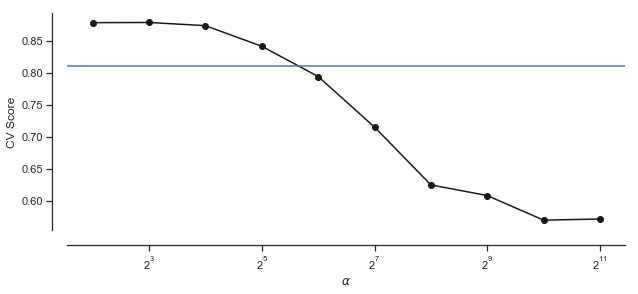

In [77]:
# logarithmic scale: log base 2
# high values to zero-out more variables
alphas = 2. ** np.arange(2, 12)
scores = np.empty_like(alphas)

for i, a in enumerate(alphas):
    lasso = Lasso(random_state = 42)
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    
lassocv = LassoCV(cv = 10, random_state = 42)
lassocv.fit(features, target)
lassocv_score = lassocv.score(features, target)
lassocv_alpha = lassocv.alpha_

plt.figure(figsize = (10, 4))
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score)
plt.xlabel(r'$\alpha$')
plt.ylabel('CV Score')
plt.xscale('log', basex = 2)
sns.despine(offset = 15)

print('CV results:', lassocv_score, lassocv_alpha)

Lasso picked 2 features and eliminated the other 68 features.


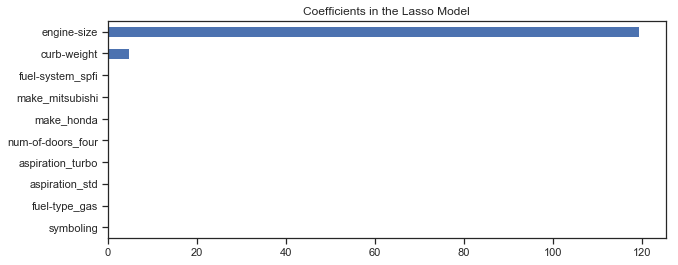

In [79]:
# lassocv coefficients
coefs = pd.Series(lassocv.coef_, index = features.columns)

# prints out the number of picked/eliminated features
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features.")

# takes first and last 10
coefs = pd.concat([coefs.sort_values().head(5), coefs.sort_values().tail(5)])

plt.figure(figsize = (10, 4))
coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [80]:
model_l1 = LassoCV(alphas = alphas, cv = 10, random_state = seed).fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

model_l1.score(X_test, y_test)

C:\Users\Sunil Kumar Sinha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.8736343845643119

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


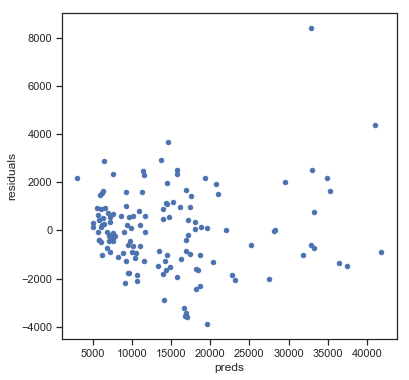

In [85]:
# residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds": model_l1.predict(X_train), "true": y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter")

# Standard code to run Random Forest Regressor 

In [86]:
rfr = RandomForestRegressor(n_estimators = 1000, random_state = seed)

param_grid = {'max_depth': list(range(5, 10, 1)),
              'max_features': [0.05, 0.1, 0.15, 0.2]}

grid_search = GridSearchCV(rfr, param_grid, 
                           n_jobs = -1, # no restriction on processor usage
                           cv = 5) # 5 fold cv
grid_search.fit(X_train, y_train)

print('Best combination:', grid_search.best_params_);

NameError: name 'GridSearchCV' is not defined